# Exercices

## Chute libre

Des étudiants ont effectués une expérience de chute libre: ils ont fait tomber un objet de chaque étage de l'Atrium, sans vitesse initiale, et ont mesuré à chaque fois le temps de chute $T$ de l'objet ainsi que la hauteur de l'étage $H$. On reporte dans le tableau ci-dessous le résultat des mesures pour 4 groupes différents.

![data chute libre](./table_analyse_chute.png)

Nous savons que l'objet chute sous l'effet de la pesanteur. Nous voulons grâce à cette expérience déterminer la magnitude de la pesanteur. Pour cela, nous utilisons un modèle simple du temps de chute libre. On montre facilement d'après la loi fondamentale de la dynamique, si on néglige les frottements de l'air, le lien entre la hauteur de l'étage $H$, le temps de chute $T$, et la magnitude de la pesanteur $g$:

$$
H = g\times\dfrac{T^2}{2}
$$

1. Identifier dans cette équation  le(s) donnée(s) de l'expérience et le(s) paramètre(s) du modèle. Écrire les données sous la forme de tableaux numpy.
2. Écrire le modèle sous la forme d'une fonction python à ajuster, de la forme $y(x;a)=ax$.
3. Déterminer la valeur de $g$ en ajustant les données du 1er groupe. Afficher à l'écran la valeur trouvée, et faire un graphique sur lequel on voit le modèle (en ligne continue) et les données (marqueurs). On veillera à légender et mettre des titres aux axes et au graphique.
4. Ajuster les données des 4 groupes grâce à une boucle, et calculer la valeur de $g$ comme la moyenne des résultats des 4 groupes.

Groupe 1:
  g =  8.830251326645204  m/s^2


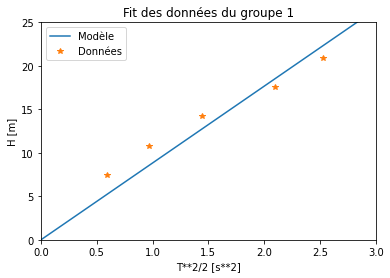

Groupe  1 :
  g =  8.830251326645204  m/s^2
Groupe  2 :
  g =  7.833725959694802  m/s^2
Groupe  3 :
  g =  7.738300675460513  m/s^2
Groupe  4 :
  g =  8.725650823609033  m/s^2


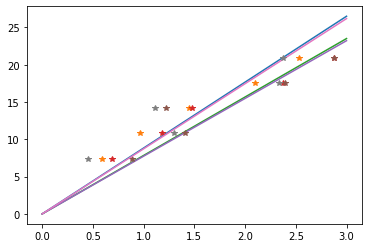

Valeur Moyenne:
  g =  8.281982196352388


In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# Ecriture des données dans un tableau numpy
T = np.array([[1.09,  1.39,  1.70,  2.05,  2.25],
              [1.17,  1.54,  1.72,  2.18,  2.40],
              [1.33,  1.68,  1.56,  2.19,  2.40],
              [0.95,  1.61,  1.49,  2.16,  2.18]])
H = np.array( [7.40,  10.80, 14.20, 17.60, 20.95])
# Modèle
def chute(x,a):
    return a*x
# fit des données du 1er groupe
y = H
x = T[0,:]**2/2
params, covar = curve_fit(chute,x,y)
print("Groupe 1:")
print("  g = ", params[0], " m/s^2")
# Graphique
xm = np.linspace(0,3,100)
plt.plot(xm,chute(xm,params[0]))
plt.plot(x,y,'*')
plt.axis([0,3,0,25])
plt.legend(('Modèle','Données'))
plt.title('Fit des données du groupe 1')
plt.xlabel('T**2/2 [s**2]')
plt.ylabel('H [m]')
plt.show()
# fit des données de tous les groupes
Ng = 4
g = np.empty(4)
for i in range(4):
    # fit des données du ieme groupe
    y = H
    x = T[i,:]**2/2
    params, covar = curve_fit(chute,x,y)
    print("Groupe ", str(i+1), ":")
    print("  g = ", params[0], " m/s^2")
    g[i] = params[0]
    # Graphique
    plt.plot(xm,chute(xm,params[0]))
    plt.plot(x,y,'*')
plt.show()
print("Valeur Moyenne:")
print("  g = ", np.mean(g))

## Loi de puissance
On va travailler à nouveau sur les données des exoplanetes. Le but de l'exercice est déterminer si les données expérimentale peuvent etre ajustées par la fonction donnée par la 3eme loi de Kepler.

1. Charger les données des exoplanetes du fichier `exoplanets.dat` et representer $\log_{10}(R^3)$ en fonction de $\log_{10}(T^2)$
2. Expliquer pourquoi la représentation graphique logarithmique est mieux adaptée que la représentation graphique linéaire.
3. Montrer également (par le calcul) qu'il est possible de faire une régression linéaire en utilisant la représentation mathématique logarithmique pour ajuster la 3eme loi de Kepler.
4. Trouver le paramètre $<k>$ de la loi de Kepler statistique grâce à une régression linéaire

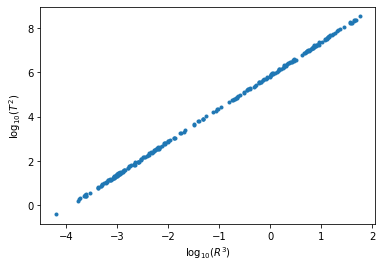

In [1]:
# 1
import matplotlib.pyplot as plt
import numpy as np

d_exp = np.loadtxt('../02-python-intermediaire/exoplanets.dat')
R3 = d_exp[:,0]
T2 = d_exp[:,1]

plt.figure()
lR3 = np.log(R3)
lT2 = np.log(T2)
plt.plot(lR3,lT2,'.')
plt.xlabel("$\log_{10}(R^3$)")
plt.ylabel("$\log_{10}(T^2$)")
plt.show()

Question 2. 
L'échelle logarithmique permet de voir toutes les données dispersées sur plusieurs ordres de grandeur.

Question 3. 
De plus, si $T^2 = k R^3$, alors $\log(T) = \frac{3}{2} \log(R) + \frac{1}{2} \log(k)$ ==> On peut également tester la relation de proportionalité via un ajustement affine des distributions logarithmiques.

a=  1.4984474486240922   b=  5.857448744451292


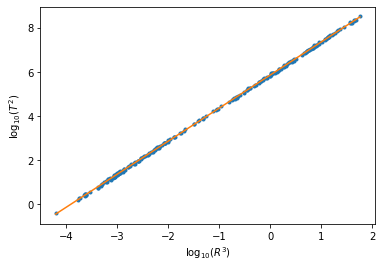

In [4]:
# 4
def reglin(xi, yi):
    '''
        Calcul les paramètres a,b du meilleur ajustement d'un modèle linéaire
        y = ax + b sur un jeu de données (xi, yi)
    '''
    N = np.size(xi)
    
    xm = np.mean(xi)
    ym = np.mean(yi)
    cov = 1/N * np.sum(xi*yi) - xm*ym
    var = 1/N * np.sum(xi**2) - xm**2
    
    b = cov / var
    a = ym - b*xm
    
    return (a,b)


a,b = lin_reg(lR3,lT2)
print('a= ', a,'  b= ',b)

plt.figure()
x = np.linspace(min(lR3),max(lR3))
plt.plot(lR3,lT2,'.',x,a*x+b)
plt.xlabel("$\log_{10}(R^3$)")
plt.ylabel("$\log_{10}(T^2$)")
plt.show()

## Décroissance exponentielle

## Sinusoïde